In [8]:
import numpy as np
import pandas as pd
import argparse

## HUM Noise

### 0.Loading Data

In [9]:
##PEAQ Basic
df_HN_PEAQ_basic_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_basic.csv',usecols = ['Hum SNR','score'])
df_HN_PEAQ_basic_48k_16bit.columns = ['Hum SNR','score']
df_HN_PEAQ_basic_mp3_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_basic.csv',usecols = ['Hum SNR.1','score.4'])
df_HN_PEAQ_basic_mp3_48k_16bit.columns = ['Hum SNR','score']

df_HN_PEAQ_adv_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['Hum SNR','score'])
df_HN_PEAQ_adv_48k_16bit.columns = ['Hum SNR','score']
df_HN_PEAQ_adv_mp3_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['Hum SNR.1','score.4'])
df_HN_PEAQ_adv_mp3_48k_16bit.columns = ['Hum SNR','score']

df_HN_VISQOL_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['Hum SNR','score'])
df_HN_VISQOL_48k_16bit.columns = ['Hum SNR','score']
df_HN_VISQOL_mp3_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['Hum SNR.1','score.4'])
df_HN_VISQOL_mp3_48k_16bit.columns = ['Hum SNR','score']

df_HN_HAAQI_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['HumNoise SNR','score'])
df_HN_HAAQI_48k_16bit.columns = ['Hum SNR','score']
df_HN_HAAQI_mp3_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['HumNoise SNR.1','score.4'])
df_HN_HAAQI_mp3_48k_16bit.columns = ['Hum SNR','score']

data_point_alterHN_PEMO_48k_16bit = np.loadtxt('Dataset/PEMO/HN_PEMOODG.csv', delimiter=',')
data_point_alterHN_PEMO_mp3_48k_16bit = np.loadtxt('Dataset/PEMO/HN_PEMOODG_MP3.csv', delimiter=',')
df_HN_PEMO_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_PEMO_48k_16bit})
df_HN_PEMO_48k_16bit = df_HN_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
df_HN_PEMO_mp3_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_PEMO_mp3_48k_16bit})
df_HN_PEMO_mp3_48k_16bit = df_HN_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')

KeyboardInterrupt: 

In [7]:
##Normalize The setting Up
df_HN_PEAQ_basic_48k_16bit["normalised_score"] = (df_HN_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_HN_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_HN_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_HN_PEAQ_adv_48k_16bit["normalised_score"] = (df_HN_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_HN_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_HN_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_HN_PEMO_48k_16bit["normalised_score"] = (df_HN_PEMO_48k_16bit['score'] +4 ) / 4
df_HN_PEMO_mp3_48k_16bit["normalised_score"] = (df_HN_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_HN_VISQOL_48k_16bit["normalised_score"] = (df_HN_VISQOL_48k_16bit['score'] +4 ) / 4
df_HN_VISQOL_mp3_48k_16bit["normalised_score"] = (df_HN_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_HN_HAAQI_48k_16bit["normalised_score"] = df_HN_HAAQI_48k_16bit['score']
df_HN_HAAQI_mp3_48k_16bit["normalised_score"] = df_HN_HAAQI_mp3_48k_16bit['score']

In [8]:
group_wav = [df_HN_PEAQ_basic_48k_16bit, df_HN_PEAQ_adv_48k_16bit, df_HN_PEMO_48k_16bit, df_HN_VISQOL_48k_16bit, df_HN_HAAQI_48k_16bit]
group_mp3 = [df_HN_PEAQ_basic_mp3_48k_16bit, df_HN_PEAQ_adv_mp3_48k_16bit,df_HN_PEMO_mp3_48k_16bit,df_HN_VISQOL_mp3_48k_16bit, df_HN_HAAQI_mp3_48k_16bit]

### 1.The HUM Noise painting

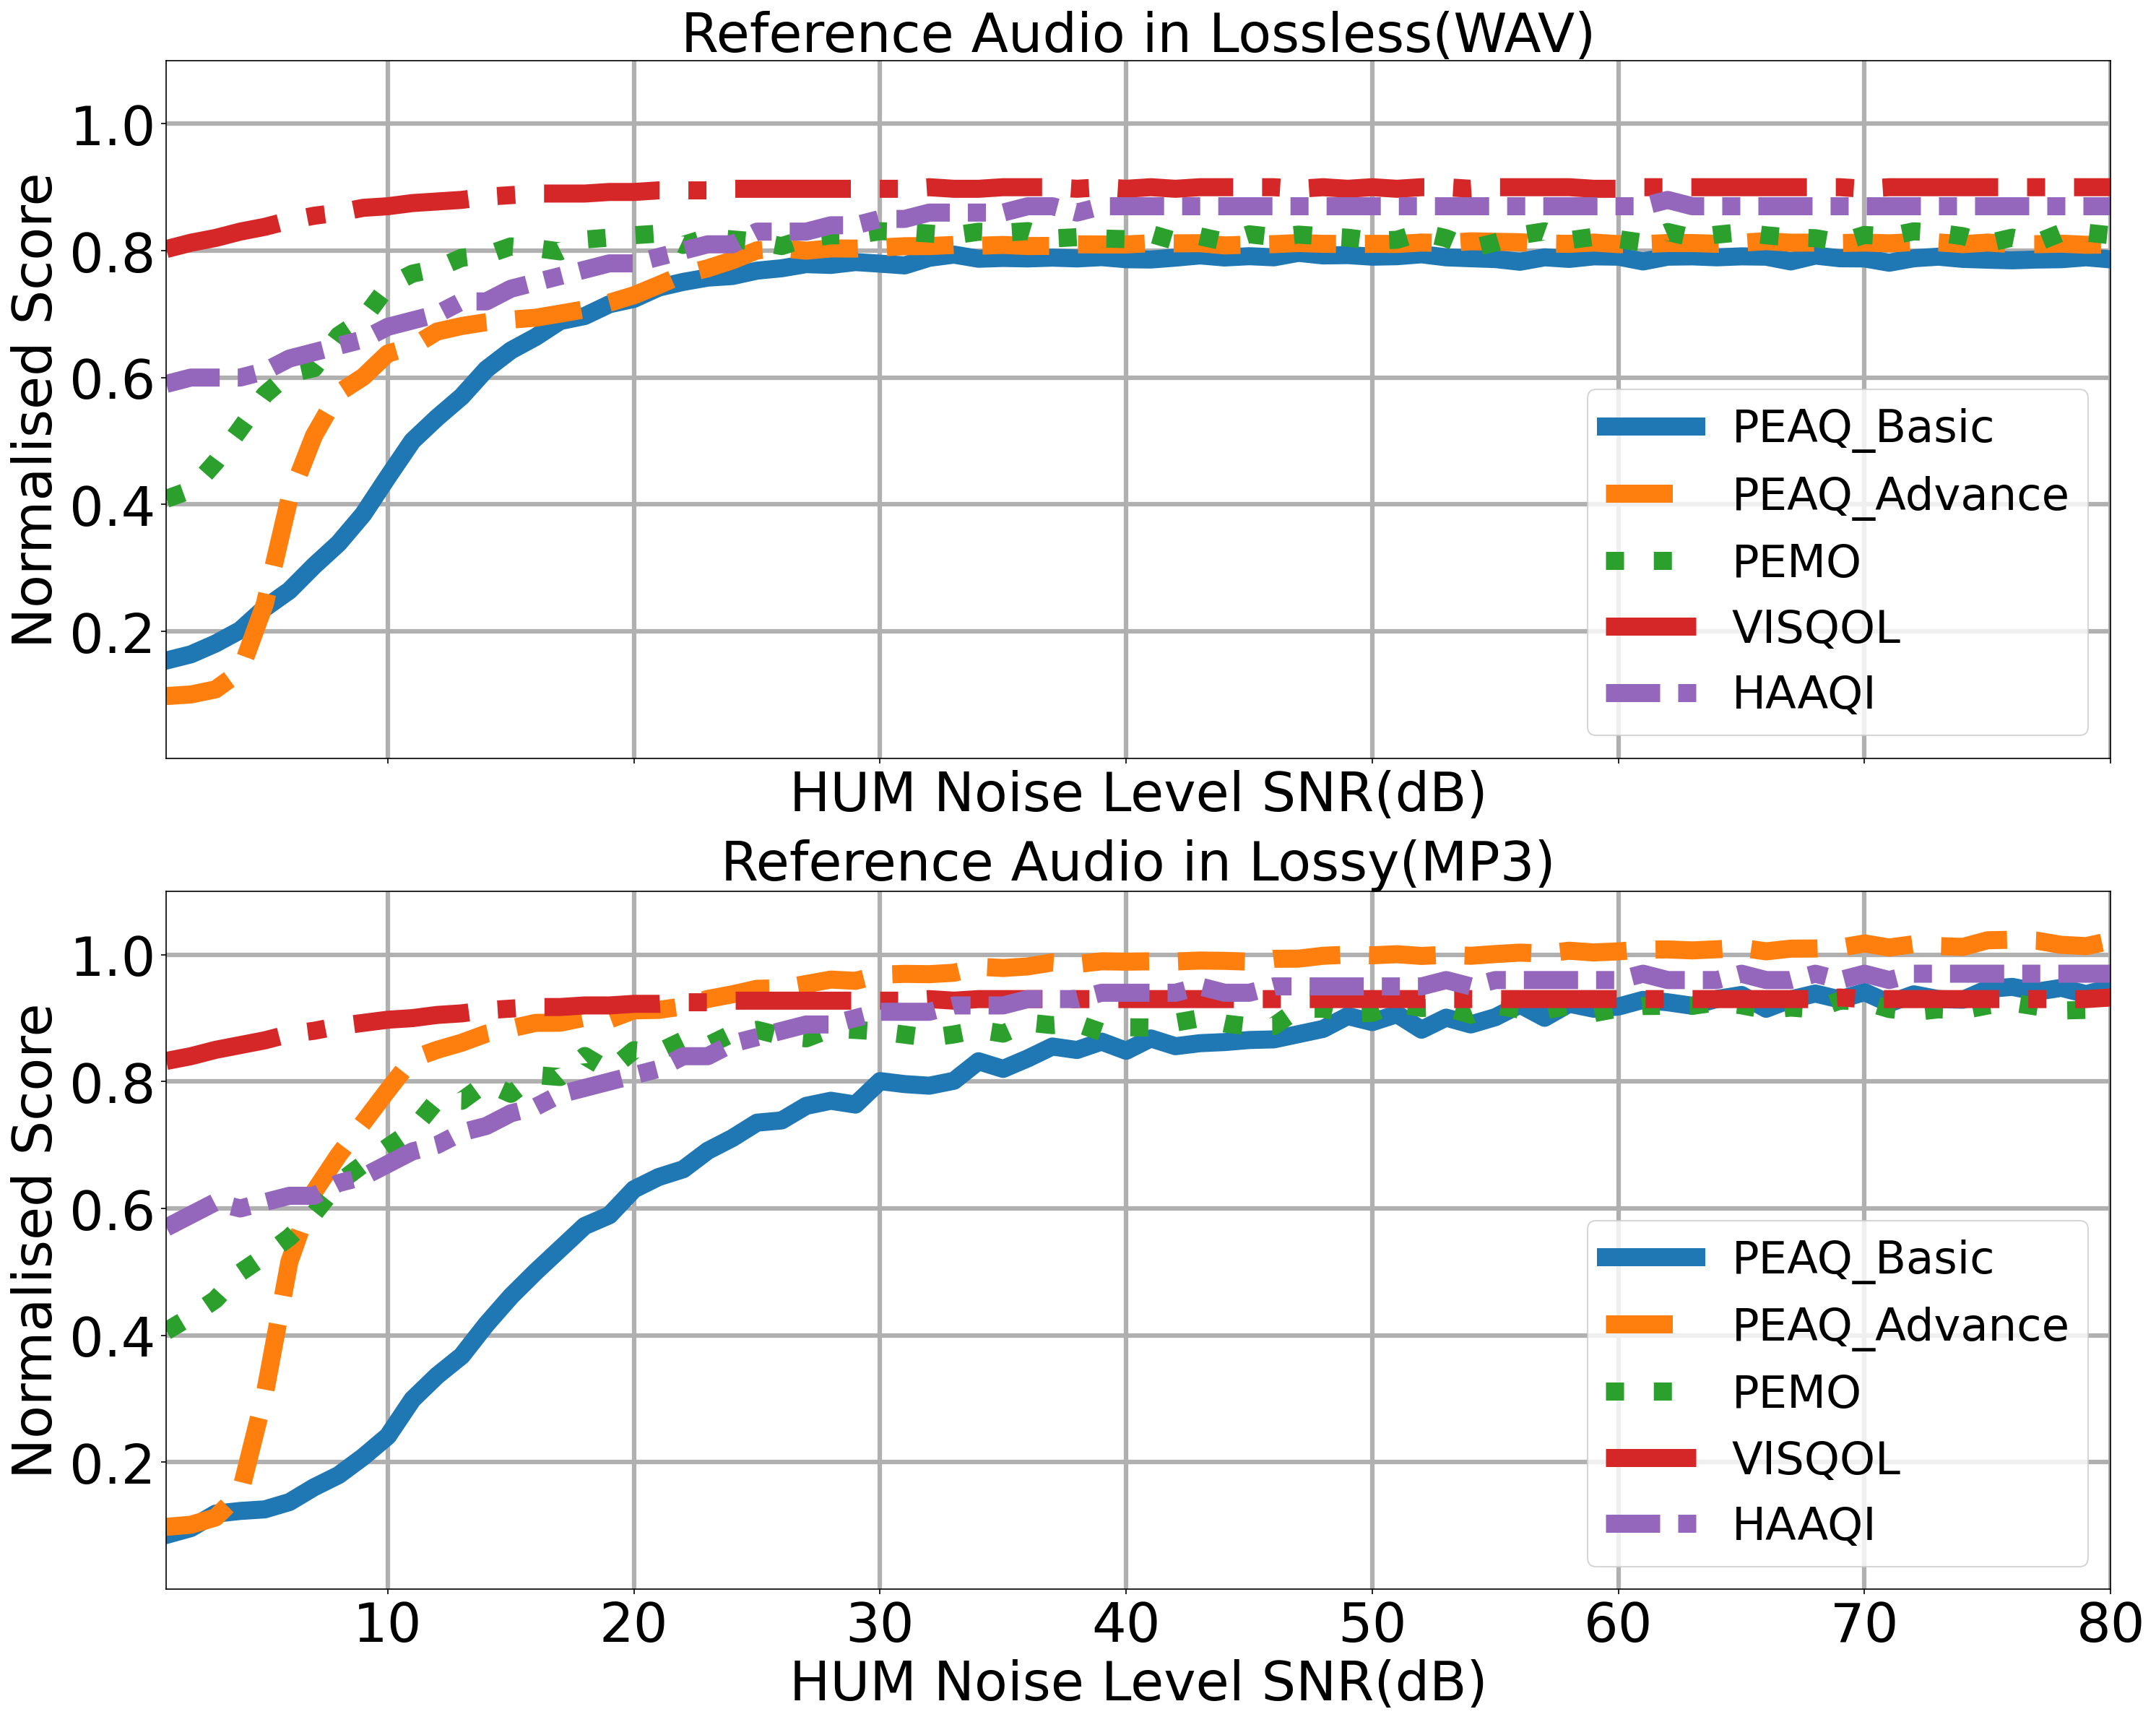

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi = 150,sharex = True)

line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['Hum SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('HUM Noise Level SNR(dB)',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 80])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['Hum SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('HUM Noise Level SNR(dB)',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 80])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## White Noise

### 0. Loading Data

In [17]:
##PEAQ Basic
df_WN_PEAQ_basic_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_basic.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_PEAQ_basic_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_PEAQ_basic_mp3_48k_16bit = pd.read_csv('/home/codecrack/Jnotebook/48k_16bit/Reggea/Metric/PEAQ/peaq_basic.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_PEAQ_basic_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

df_WN_PEAQ_adv_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_PEAQ_adv_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_PEAQ_adv_mp3_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_PEAQ_adv_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

df_WN_VISQOL_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_VISQOL_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_VISQOL_mp3_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_VISQOL_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

df_WN_HAAQI_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['WhiteNoise SNR','score.1'])
df_WN_HAAQI_48k_16bit.columns = ['WhiteNoise SNR','score']
df_WN_HAAQI_mp3_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['WhiteNoise SNR.1','score.5'])
df_WN_HAAQI_mp3_48k_16bit.columns = ['WhiteNoise SNR','score']

data_point_alterWN_PEMO_48k_16bit = np.loadtxt('Dataset/WN_PEMOODG.csv', delimiter=',')
data_point_alterWN_PEMO_mp3_48k_16bit = np.loadtxt('Dataset/WN_PEMOODG_MP3.csv', delimiter=',')
df_WN_PEMO_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_PEMO_48k_16bit})
df_WN_PEMO_48k_16bit = df_WN_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
df_WN_PEMO_mp3_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_PEMO_mp3_48k_16bit})
df_WN_PEMO_mp3_48k_16bit = df_WN_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')

In [18]:
##Normalize The setting Up
df_WN_PEAQ_basic_48k_16bit["normalised_score"] = (df_WN_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_WN_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_WN_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_WN_PEAQ_adv_48k_16bit["normalised_score"] = (df_WN_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_WN_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_WN_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_WN_PEMO_48k_16bit["normalised_score"] = (df_WN_PEMO_48k_16bit['score'] +4 ) / 4
df_WN_PEMO_mp3_48k_16bit["normalised_score"] = (df_WN_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_WN_VISQOL_48k_16bit["normalised_score"] = (df_WN_VISQOL_48k_16bit['score'] +4 ) / 4
df_WN_VISQOL_mp3_48k_16bit["normalised_score"] = (df_WN_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_WN_HAAQI_48k_16bit["normalised_score"] = df_WN_HAAQI_48k_16bit['score']
df_WN_HAAQI_mp3_48k_16bit["normalised_score"] = df_WN_HAAQI_mp3_48k_16bit['score']

In [19]:
group_wav = [df_WN_PEAQ_basic_48k_16bit, df_WN_PEAQ_adv_48k_16bit, df_WN_PEMO_48k_16bit, df_WN_VISQOL_48k_16bit, df_WN_HAAQI_48k_16bit]
group_mp3 = [df_WN_PEAQ_basic_mp3_48k_16bit, df_WN_PEAQ_adv_mp3_48k_16bit, df_WN_PEMO_mp3_48k_16bit, df_WN_VISQOL_mp3_48k_16bit, df_WN_HAAQI_mp3_48k_16bit, ]

### 1. The WhiteNoise Noise painting

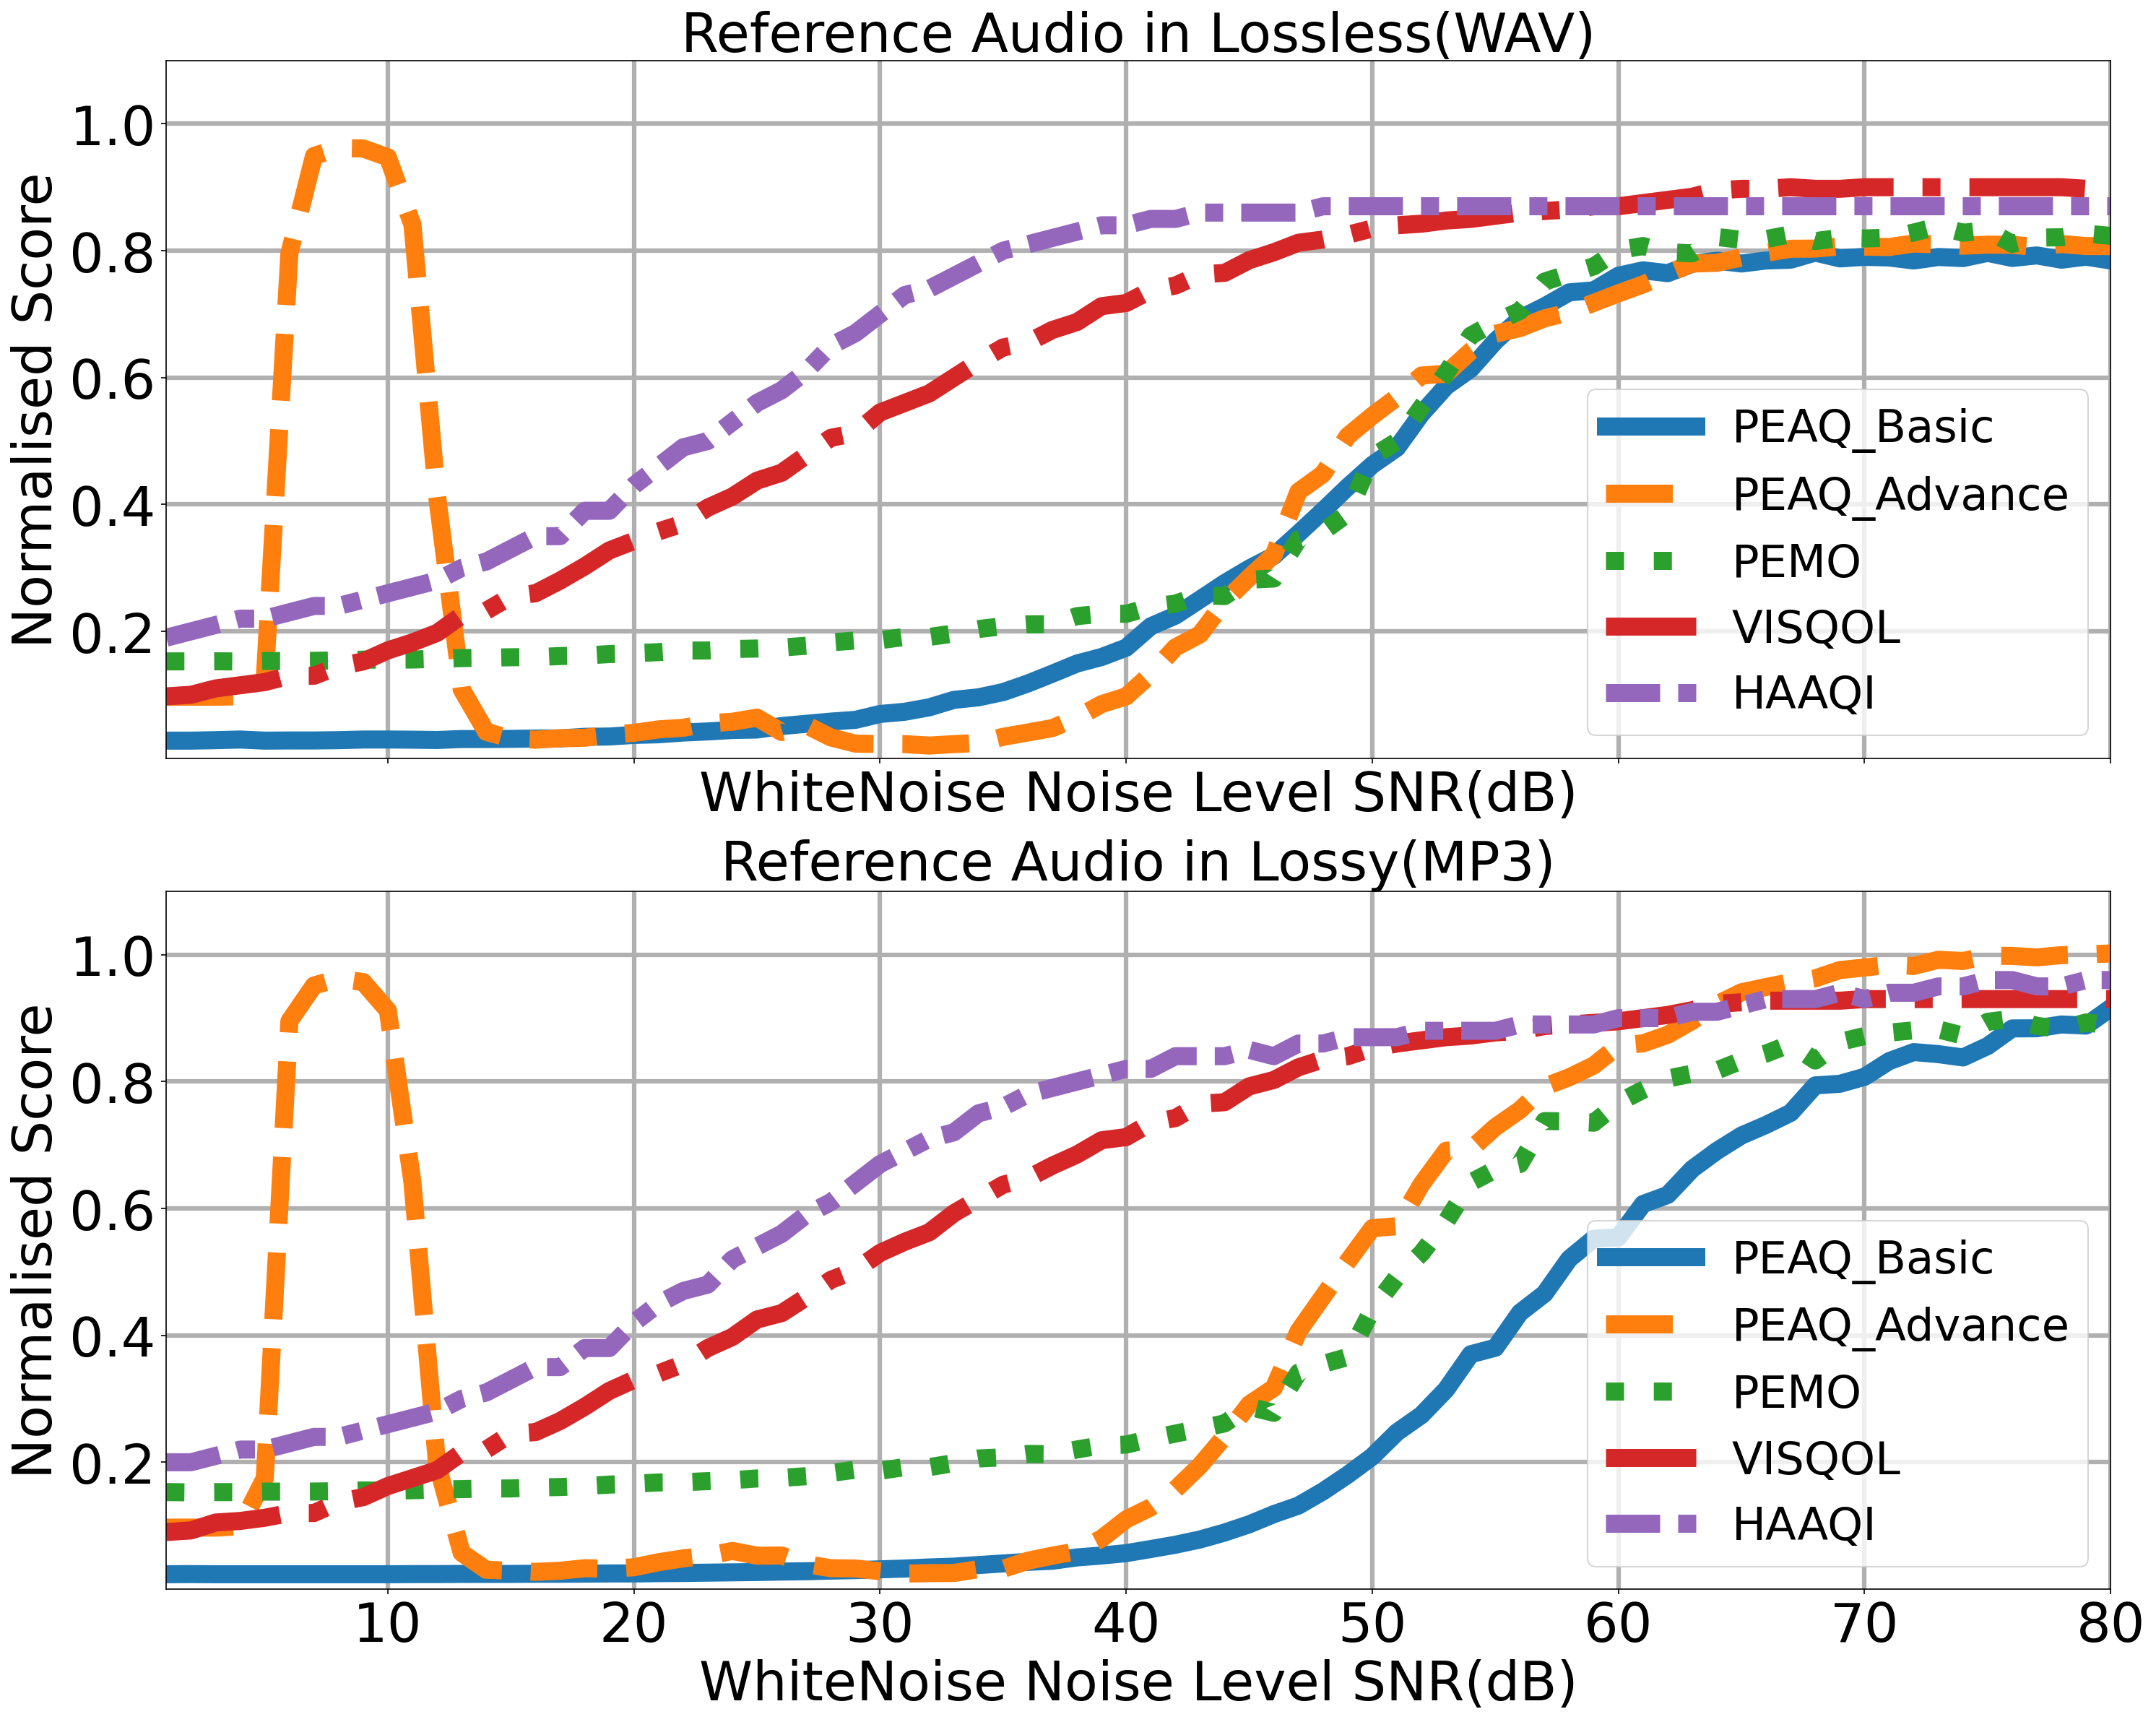

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi = 150,sharex = True)

line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['WhiteNoise SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('WhiteNoise Noise Level SNR(dB)',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 80])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['WhiteNoise SNR'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('WhiteNoise Noise Level SNR(dB)',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 80])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Clipping Percentage

### 0. Loading Data

In [21]:
##PEAQ Basic
df_CP_PEAQ_basic_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_basic.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_PEAQ_basic_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_PEAQ_basic_mp3_48k_16bit = pd.read_csv('vPEAQ/peaq_basic.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_PEAQ_basic_mp3_48k_16bit.columns = ['Clipping Percentage','score']

df_CP_PEAQ_adv_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_PEAQ_adv_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_PEAQ_adv_mp3_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_PEAQ_adv_mp3_48k_16bit.columns = ['Clipping Percentage','score']

df_CP_VISQOL_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_VISQOL_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_VISQOL_mp3_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_VISQOL_mp3_48k_16bit.columns = ['Clipping Percentage','score']

df_CP_HAAQI_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['Clipping Percentage(%)','score.2'])
df_CP_HAAQI_48k_16bit.columns = ['Clipping Percentage','score']
df_CP_HAAQI_mp3_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['Clipping Percentage(%).1','score.6'])
df_CP_HAAQI_mp3_48k_16bit.columns = ['Clipping Percentage','score']

data_point_alterCP_PEMO_48k_16bit = np.loadtxt('/Dataset/PEMO/CP_PEMOODG.csv', delimiter=',')
data_point_alterCP_PEMO_mp3_48k_16bit = np.loadtxt('Dataset/PEMO/CP_PEMOODG_MP3.csv', delimiter=',')
df_CP_PEMO_48k_16bit = pd.DataFrame({'Clipping Percentage': np.arange(1,100,1), 'score': data_point_alterCP_PEMO_48k_16bit})
df_CP_PEMO_48k_16bit = df_CP_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
df_CP_PEMO_mp3_48k_16bit = pd.DataFrame({'Clipping Percentage': np.arange(1,100,1), 'score': data_point_alterCP_PEMO_mp3_48k_16bit})
df_CP_PEMO_mp3_48k_16bit = df_CP_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')

In [22]:
##Normalize The setting Up
df_CP_PEAQ_basic_48k_16bit["normalised_score"] = (df_CP_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_CP_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_CP_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_CP_PEAQ_adv_48k_16bit["normalised_score"] = (df_CP_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_CP_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_CP_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_CP_PEMO_48k_16bit["normalised_score"] = (df_CP_PEMO_48k_16bit['score'] +4 ) / 4
df_CP_PEMO_mp3_48k_16bit["normalised_score"] = (df_CP_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_CP_VISQOL_48k_16bit["normalised_score"] = (df_CP_VISQOL_48k_16bit['score'] +4 ) / 4
df_CP_VISQOL_mp3_48k_16bit["normalised_score"] = (df_CP_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_CP_HAAQI_48k_16bit["normalised_score"] = df_CP_HAAQI_48k_16bit['score']
df_CP_HAAQI_mp3_48k_16bit["normalised_score"] = df_CP_HAAQI_mp3_48k_16bit['score']

In [23]:
group_wav = [df_CP_PEAQ_basic_48k_16bit, df_CP_PEAQ_adv_48k_16bit,df_CP_PEMO_48k_16bit, df_CP_VISQOL_48k_16bit, df_CP_HAAQI_48k_16bit, ]
group_mp3 = [df_CP_PEAQ_basic_mp3_48k_16bit, df_CP_PEAQ_adv_mp3_48k_16bit, df_CP_PEMO_mp3_48k_16bit, df_CP_VISQOL_mp3_48k_16bit, df_CP_HAAQI_mp3_48k_16bit, ]

### 1. The Clipping Noise painting

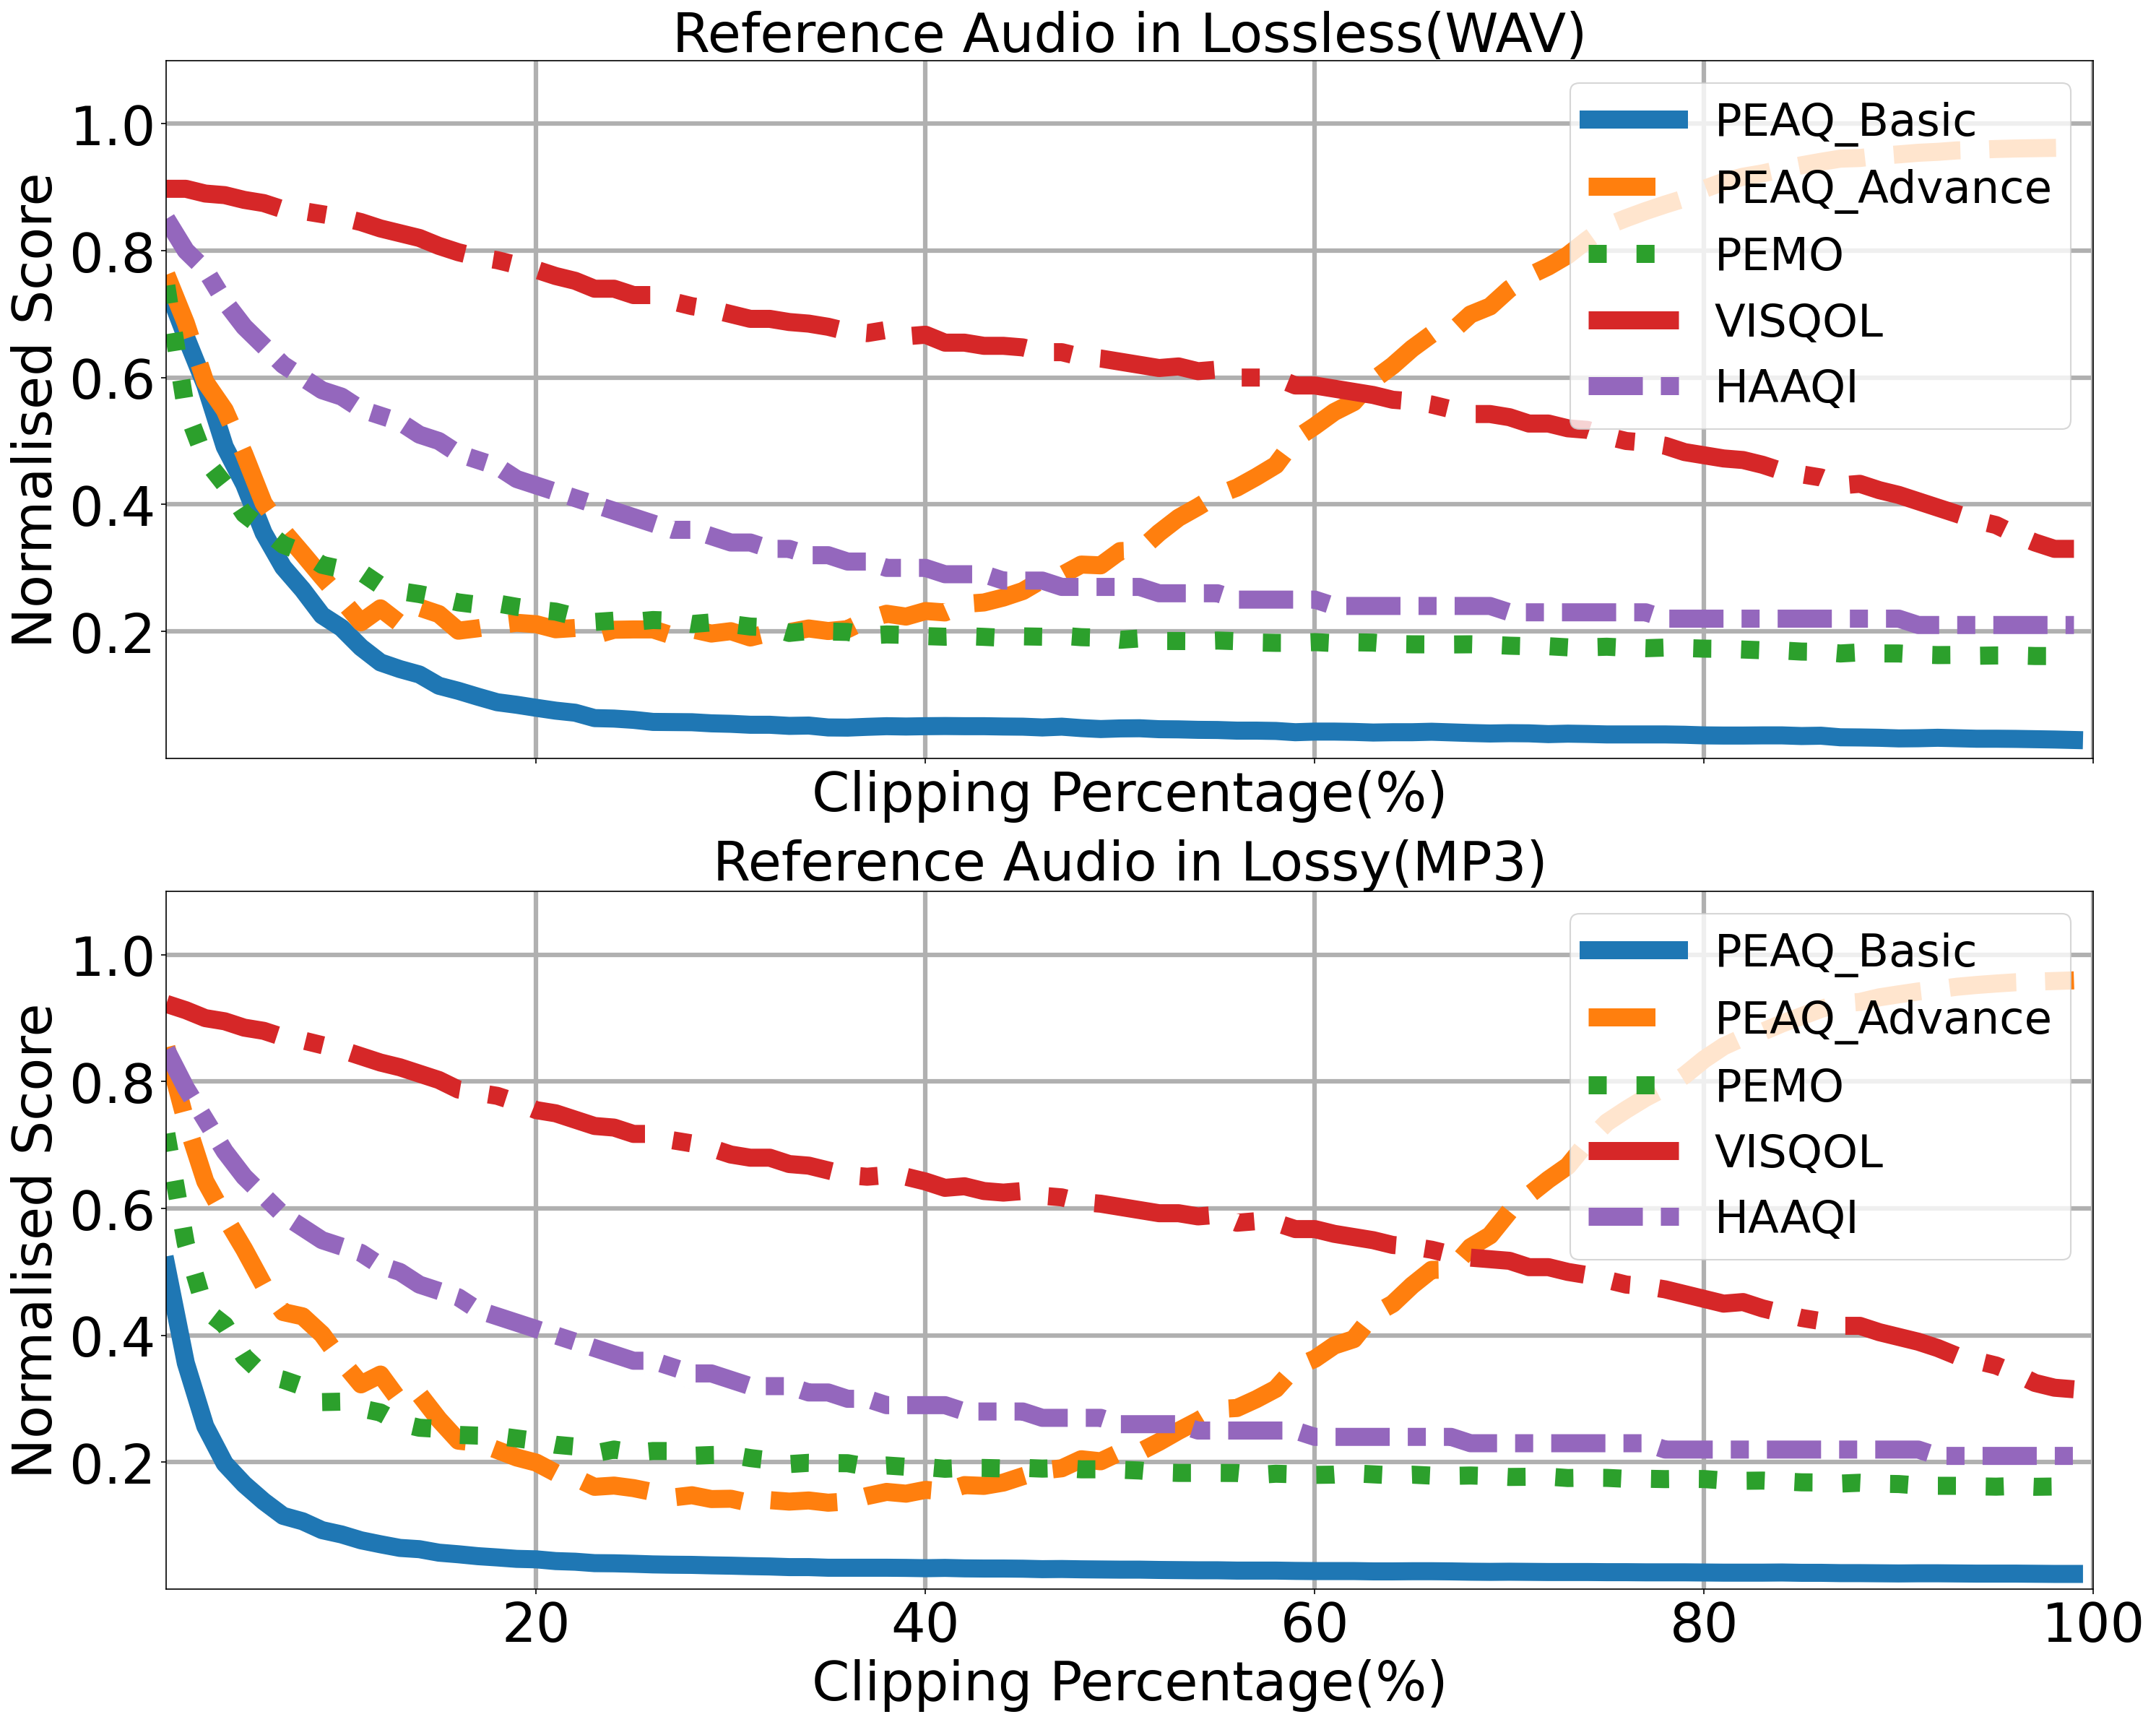

In [24]:
import matplotlib.pyplot as plt
import pandas as pd


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi = 150,sharex = True)
line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['Clipping Percentage'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('Clipping Percentage(%)',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 100])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['Clipping Percentage'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('Clipping Percentage(%)',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 100])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Drop Out

### 0. Loading Data

In [25]:
##PEAQ Basic
df_DO_PEAQ_basic_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_basic.csv',usecols = ['Dropout Num','score.3'])
df_DO_PEAQ_basic_48k_16bit.columns = ['Dropout Num','score']
df_DO_PEAQ_basic_mp3_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_basic.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_PEAQ_basic_mp3_48k_16bit.columns = ['Dropout Num','score']

df_DO_PEAQ_adv_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['Dropout Num','score.3'])
df_DO_PEAQ_adv_48k_16bit.columns = ['Dropout Num','score']
df_DO_PEAQ_adv_mp3_48k_16bit = pd.read_csv('Dataset/PEAQ/peaq_adv.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_PEAQ_adv_mp3_48k_16bit.columns = ['Dropout Num','score']

df_DO_VISQOL_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['Dropout Num','score.3'])
df_DO_VISQOL_48k_16bit.columns = ['Dropout Num','score']
df_DO_VISQOL_mp3_48k_16bit = pd.read_csv('Dataset/VISQOL/visqol.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_VISQOL_mp3_48k_16bit.columns = ['Dropout Num','score']

df_DO_HAAQI_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['Dropout Num','score.3'])
df_DO_HAAQI_48k_16bit.columns = ['Dropout Num','score']
df_DO_HAAQI_mp3_48k_16bit = pd.read_csv('Dataset/HAAQI/haaqi.csv',usecols = ['Dropout Num.1','score.7'])
df_DO_HAAQI_mp3_48k_16bit.columns = ['Dropout Num','score']

data_point_alterDO_PEMO_48k_16bit = np.loadtxt('Dataset/PEMO/DO_PEMOODG.csv', delimiter=',')
data_point_alterDO_PEMO_mp3_48k_16bit = np.loadtxt('Dataset/PEMO/DO_PEMOODG_MP3.csv', delimiter=',')
df_DO_PEMO_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_PEMO_48k_16bit})
df_DO_PEMO_48k_16bit = df_DO_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
df_DO_PEMO_mp3_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_PEMO_mp3_48k_16bit})
df_DO_PEMO_mp3_48k_16bit = df_DO_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')

In [26]:
##Normalize The setting Up
df_DO_PEAQ_basic_48k_16bit["normalised_score"] = (df_DO_PEAQ_basic_48k_16bit['score'] +4 ) / 4
df_DO_PEAQ_basic_mp3_48k_16bit["normalised_score"] = (df_DO_PEAQ_basic_mp3_48k_16bit['score'] +4 ) / 4

df_DO_PEAQ_adv_48k_16bit["normalised_score"] = (df_DO_PEAQ_adv_48k_16bit['score'] +4 ) / 4
df_DO_PEAQ_adv_mp3_48k_16bit["normalised_score"] = (df_DO_PEAQ_adv_mp3_48k_16bit['score'] +4 ) / 4

df_DO_PEMO_48k_16bit["normalised_score"] = (df_DO_PEMO_48k_16bit['score'] +4 ) / 4
df_DO_PEMO_mp3_48k_16bit["normalised_score"] = (df_DO_PEMO_mp3_48k_16bit['score'] +4 ) / 4

df_DO_VISQOL_48k_16bit["normalised_score"] = (df_DO_VISQOL_48k_16bit['score'] +4 ) / 4
df_DO_VISQOL_mp3_48k_16bit["normalised_score"] = (df_DO_VISQOL_mp3_48k_16bit['score'] +4 ) / 4

df_DO_HAAQI_48k_16bit["normalised_score"] = df_DO_HAAQI_48k_16bit['score']
df_DO_HAAQI_mp3_48k_16bit["normalised_score"] = df_DO_HAAQI_mp3_48k_16bit['score']

In [27]:
group_wav = [df_DO_PEAQ_basic_48k_16bit, df_DO_PEAQ_adv_48k_16bit, df_DO_PEMO_48k_16bit, df_DO_VISQOL_48k_16bit, df_DO_HAAQI_48k_16bit]
group_mp3 = [df_DO_PEAQ_basic_mp3_48k_16bit, df_DO_PEAQ_adv_mp3_48k_16bit,df_DO_PEMO_mp3_48k_16bit,df_DO_VISQOL_mp3_48k_16bit, df_DO_HAAQI_mp3_48k_16bit]

### 1. The Dropout number painting

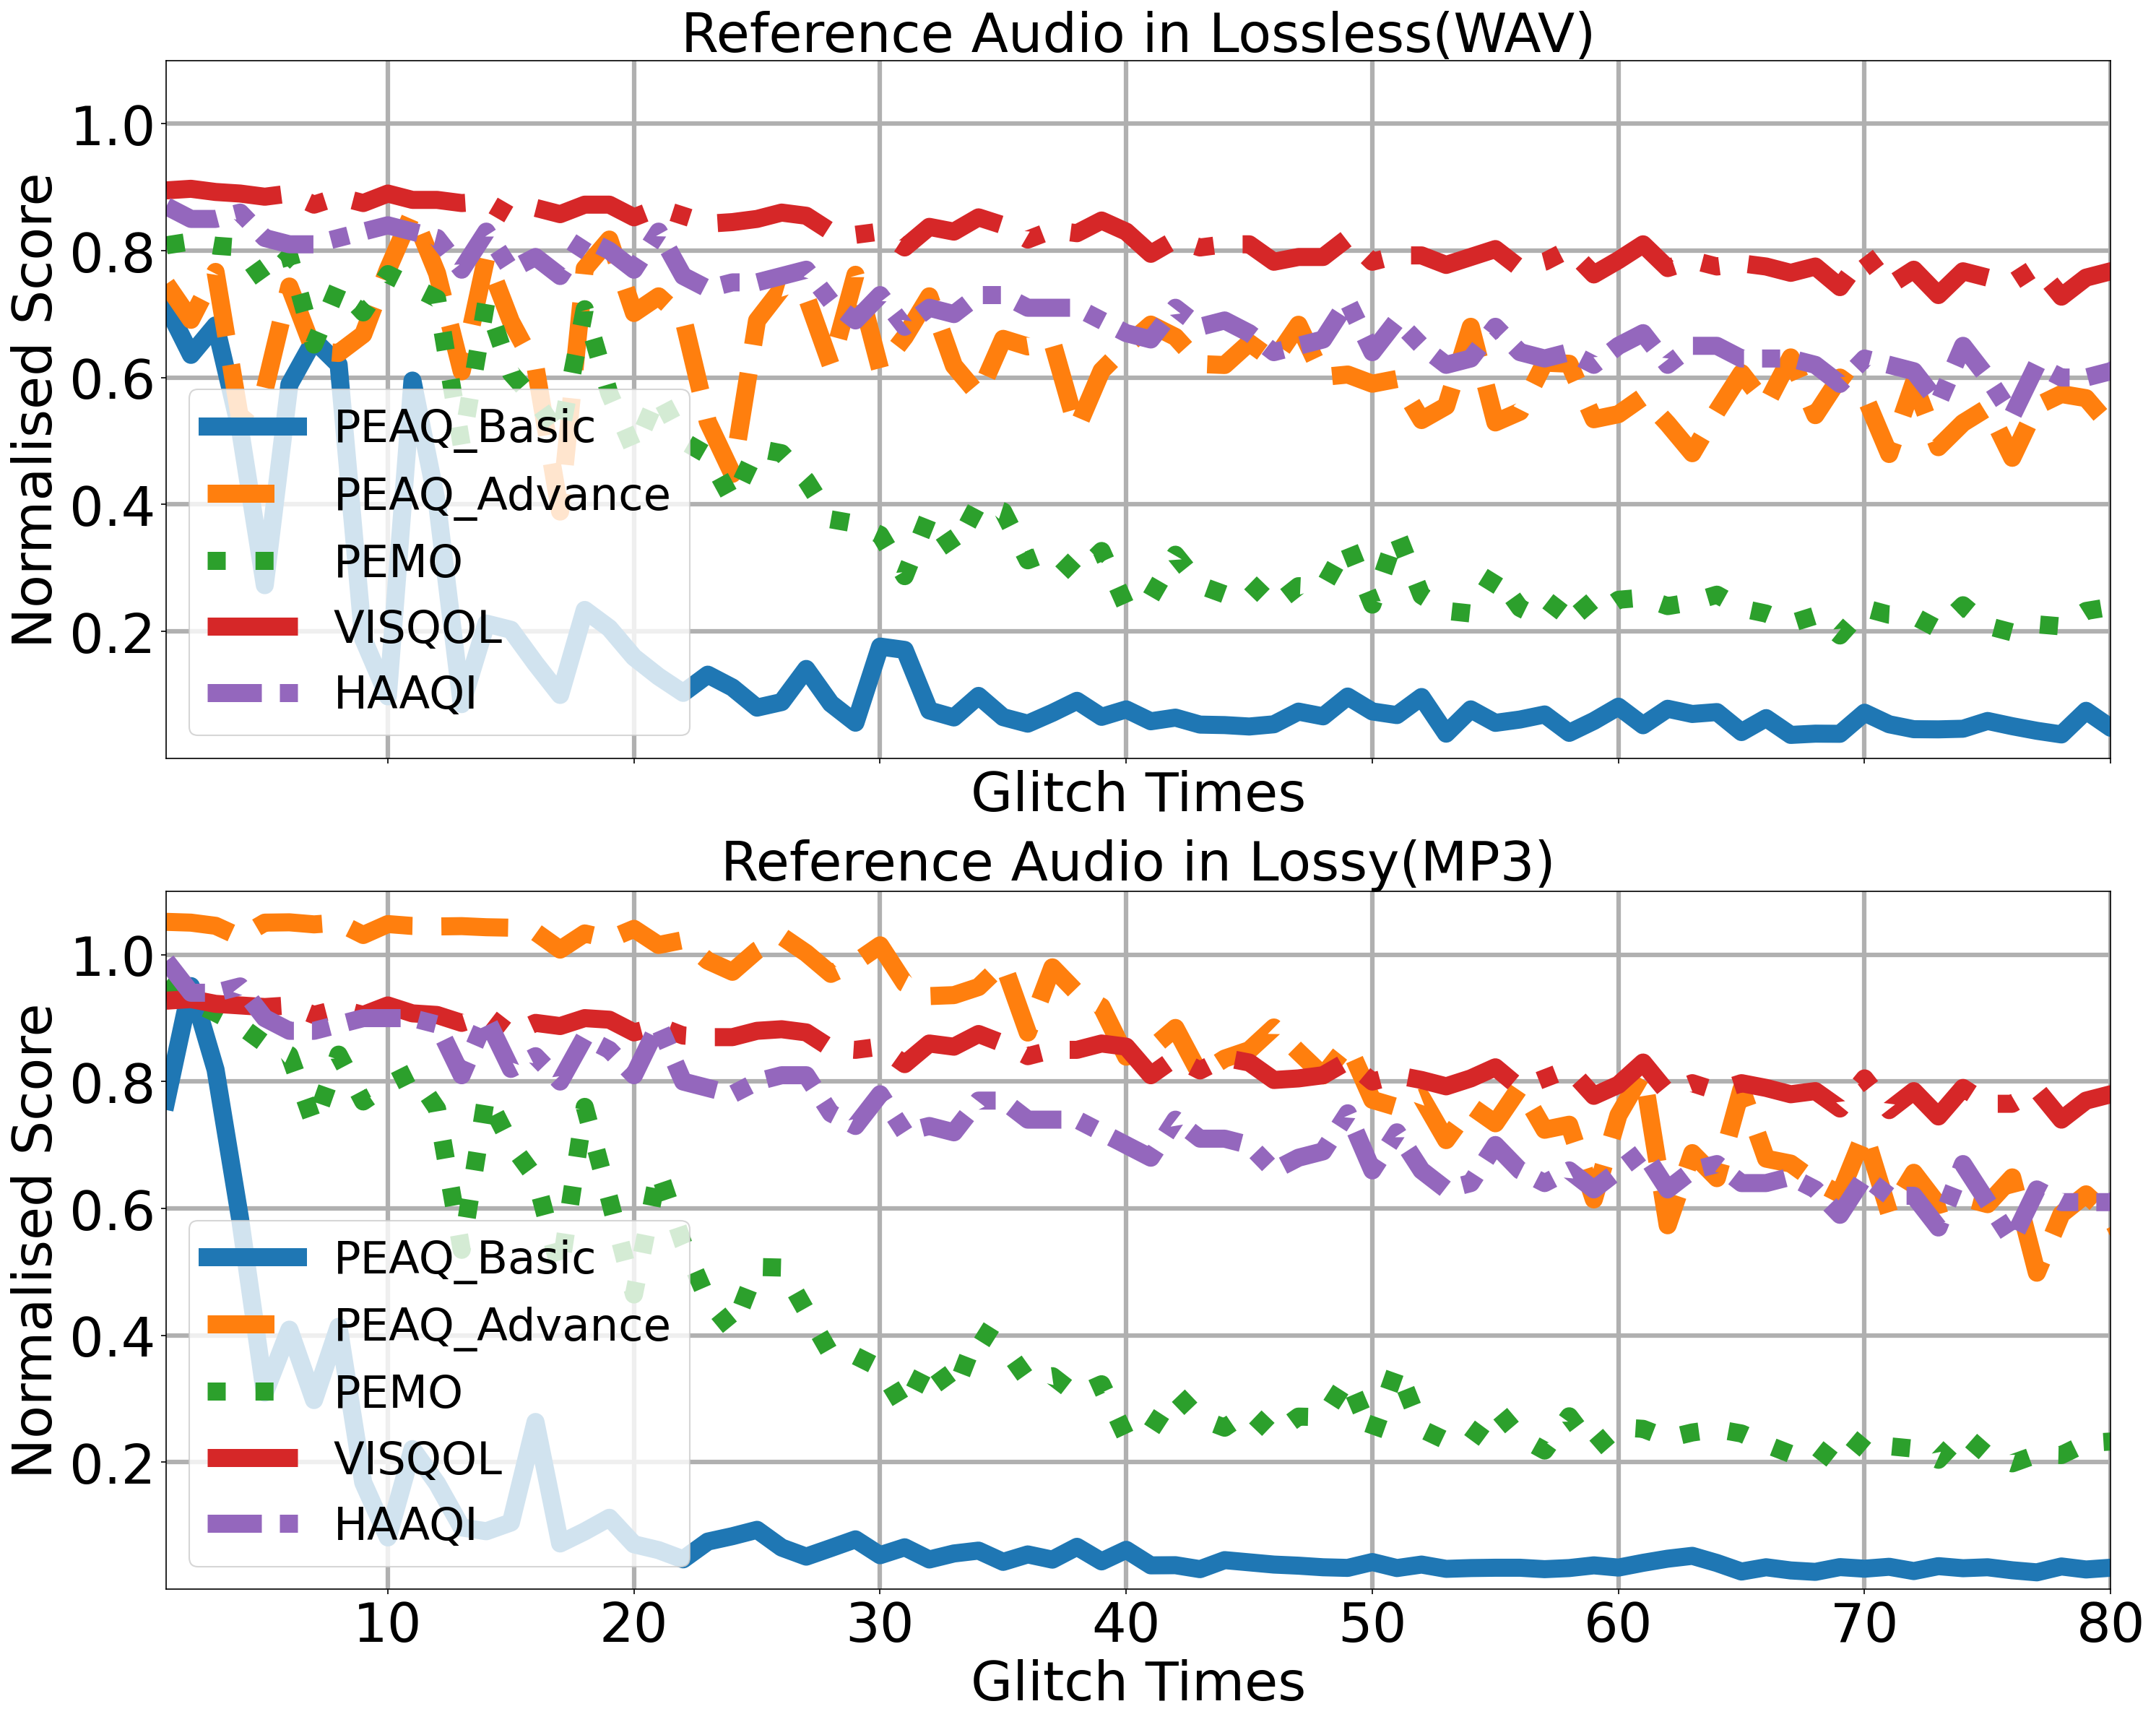

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16), dpi = 150,sharex = True)

line_styles = ['-','--',':','-.',(0, (3, 1, 1, 1)),] # Custom: Dash-Dot-Dot
line_width = 2.5  # Set line thickness
metric_type = ['PEAQ_Basic', 'PEAQ_Advance', 'PEMO','VISQOL','HAAQI']

# Plot group1 on the first subplot
for df, label, style in zip(group_wav, metric_type, line_styles):
    ax1.plot(df['Dropout Num'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax1.set_title('Reference Audio in Lossless(WAV)',fontsize=36)
ax1.set_xlabel('Glitch Times',fontsize=36)
ax1.set_ylabel('Normalised Score',fontsize=36)
ax1.set_xlim([1, 80])  # Display x-axis values between 1 and 80
ax1.set_ylim([0, 1.1])  # Display y-axis values between 0 and 1.1
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='both', labelsize=36) 
ax1.legend(fontsize=30)
ax1.grid(True,linewidth=3) 

# Plot group2 on the second subplot
for df, label, style in zip(group_mp3, metric_type, line_styles):
    ax2.plot(df['Dropout Num'], df['normalised_score'], linestyle=style, label=label, linewidth=12)
ax2.set_title('Reference Audio in Lossy(MP3)',fontsize=36)
ax2.set_xlabel('Glitch Times',fontsize=36)
ax2.set_ylabel('Normalised Score',fontsize=36)
ax2.set_xlim([1, 80])  # Display x-axis values between 20 and 80
ax2.set_ylim([0, 1.1])  # Display y-axis values between -0.5 and 0.5
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='both', labelsize=36) 
ax2.legend(fontsize=30)
ax2.grid(True,linewidth=3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [3]:
df_all = pd.read_csv('/home/codecrack/Jnotebook/48k_16bit/Reggea/Metric/PEAQ/peaq_basic.csv')
df_all

,Hum SNR,score,WhiteNoise SNR,score.1,Clipping Percentage(%),score.2,Dropout Num,score.3,Hum SNR.1,score.4,WhiteNoise SNR.1,score.5,Clipping Percentage(%).1,score.6,Dropout Num.1,score.7
0,1,-3.384,1,-3.889,1,-1.021,1,-1.147,1,-3.658,1,-3.906,1,-1.960,1,-0.921
1,2,-3.345,2,-3.889,2,-1.342,2,-1.457,2,-3.615,2,-3.905,2,-2.574,2,-0.198
2,3,-3.277,3,-3.886,3,-1.647,3,-1.271,3,-3.524,3,-3.906,3,-2.973,3,-0.725
3,4,-3.193,4,-3.882,4,-2.036,4,-1.932,4,-3.507,4,-3.906,4,-3.208,4,-1.668
4,5,-3.053,5,-3.889,5,-2.273,5,-2.909,5,-3.497,5,-3.906,5,-3.339,5,-2.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,-0.870,95,-0.867,95,-3.877,95,-3.645,95,-0.215,95,-0.194,95,-3.902,95,-3.837
95,96,-0.853,96,-0.860,96,-3.878,96,-3.612,96,-0.223,96,-0.251,96,-3.902,96,-3.885
96,97,-0.847,97,-0.849,97,-3.880,97,-3.806,97,-0.197,97,-0.158,97,-3.903,97,-3.896
97,98,-0.853,98,-0.862,98,-3.882,98,-3.672,98,-0.244,98,-0.195,98,-3.904,98,-3.886


In [9]:
df_WN_PEAQ_basic_48k_16bit

,WhiteNoise SNR,score,normalised_score
0,-3.384,1,1.25
1,-3.345,2,1.50
2,-3.277,3,1.75
3,-3.193,4,2.00
4,-3.053,5,2.25
...,...,...,...
94,-0.870,95,24.75
95,-0.853,96,25.00
96,-0.847,97,25.25
97,-0.853,98,25.50
